In [1]:
import joblib 
import numpy as np
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import hist
from hist import Hist 
from uncertainties import ufloat, unumpy
from tqdm import tqdm
import re
import uncertainties

import sys
core_code_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow'
sys.path.append(core_code_path)

from core.Calculate_SF import Calcu_Frac_unumpy, Normalize_unumpy, safe_array_divide_unumpy
from core.utils import HistBins, label_var, label_pt_bin, convert_unumpy2hist


# Check Fraction unumpy

In [2]:
jet_nTracks_Extraction_Results_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new/nominal/plots/ADE/Extraction_Results/jet_nTracks_Extraction_Results.pkl'
jet_nTracks_Extraction_Results = joblib.load(jet_nTracks_Extraction_Results_path)

In [46]:
fractions_unumpy = dict.fromkeys(label_pt_bin[:-1])
for l_pt in label_pt_bin[:-1]:
    Forward_Quark = jet_nTracks_Extraction_Results['jet_nTracks'][l_pt]['Forward_Quark']
    Central_Quark = jet_nTracks_Extraction_Results['jet_nTracks'][l_pt]['Central_Quark']

    Forward = jet_nTracks_Extraction_Results['jet_nTracks'][l_pt]['Forward_MC']
    Central = jet_nTracks_Extraction_Results['jet_nTracks'][l_pt]['Central_MC']

    f, f_inv = Calcu_Frac_unumpy(Forward_Quark, Central_Quark, Forward, Central)
    fractions_unumpy[l_pt] = f

In [47]:
fractions_unumpy

{500: array([[0.5687417864008377+/-0.0002881185848471797,
         0.4312582135991623+/-0.0002881185848471797],
        [0.4030923851734515+/-0.00022473766402322917,
         0.5969076148265485+/-0.00022473766402322917]], dtype=object),
 600: array([[0.6163649487532317+/-0.00023861326253524933,
         0.38363505124676833+/-0.00023861326253524933],
        [0.44921553827900856+/-0.00019188190434866697,
         0.5507844617209914+/-0.00019188190434866697]], dtype=object),
 800: array([[0.6599404645484899+/-0.0003145850109978872,
         0.34005953545151013+/-0.0003145850109978872],
        [0.5042360818745285+/-0.0002625144420450116,
         0.4957639181254715+/-0.0002625144420450116]], dtype=object),
 1000: array([[0.6954872610819424+/-0.00043032932041855006,
         0.30451273891805763+/-0.00043032932041855006],
        [0.5559059604926192+/-0.00037437959122343717,
         0.4440940395073808+/-0.00037437959122343717]], dtype=object),
 1200: array([[0.7300586153650407+/-0.0006161

# Check Reweight Factor

In [3]:
none_Extraction_Results_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new/nominal/plots/ADE/Extraction_Results/none_Extraction_Results.pkl'
none_Extraction_Results = joblib.load(none_Extraction_Results_path)

In [6]:
reweight_factors_unumpy = dict.fromkeys(label_pt_bin[:-1])
for l_pt in label_pt_bin[:-1]:
    p_Forward_Quark = none_Extraction_Results['jet_nTracks'][l_pt]['p_Forward_Quark'] 
    p_Central_Quark = none_Extraction_Results['jet_nTracks'][l_pt]['p_Central_Quark'] 

    reweight_factors_unumpy[l_pt] = safe_array_divide_unumpy(p_Forward_Quark, p_Central_Quark)

In [4]:
nominal_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new/nominal'
nominal_path = Path(nominal_path)

reweight_factor_path = nominal_path / "reweight_factor.pkl"
reweight_factor = joblib.load(reweight_factor_path)

In [7]:
np.allclose(reweight_factor[1500]['jet_nTracks']['quark_factor'], unumpy.nominal_values(reweight_factors_unumpy[1500]))

True

In [9]:
Forward_MC = none_Extraction_Results['jet_nTracks'][500]['Forward_MC'] 
Central_MC = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_MC'] 
unumpy.nominal_values(safe_array_divide_unumpy(Forward_MC, Central_MC))

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
Central_MC_before = none_Extraction_Results['jet_nTracks'][500]['Central_MC'] 
Central_MC_after = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_MC'] 
unumpy.nominal_values(safe_array_divide_unumpy(Central_MC_after, Central_MC_before))

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])

In [14]:
Central_MC_before = none_Extraction_Results['jet_nTracks'][500]['Central_Quark'] 
Central_MC_after = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_Quark'] 
unumpy.nominal_values(safe_array_divide_unumpy(Central_MC_after, Central_MC_before))

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])

In [15]:
Central_MC_before = none_Extraction_Results['jet_nTracks'][500]['Central_Gluon'] 
Central_MC_after = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_Gluon'] 
unumpy.nominal_values(safe_array_divide_unumpy(Central_MC_after, Central_MC_before))

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])

In [13]:
unumpy.nominal_values(reweight_factors_unumpy[500])

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])

In [13]:
reweight_factors_unumpy_hist = convert_unumpy2hist(reweight_factors_unumpy[500], bins=np.linspace(0,60,61))

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x14726b2bf5b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

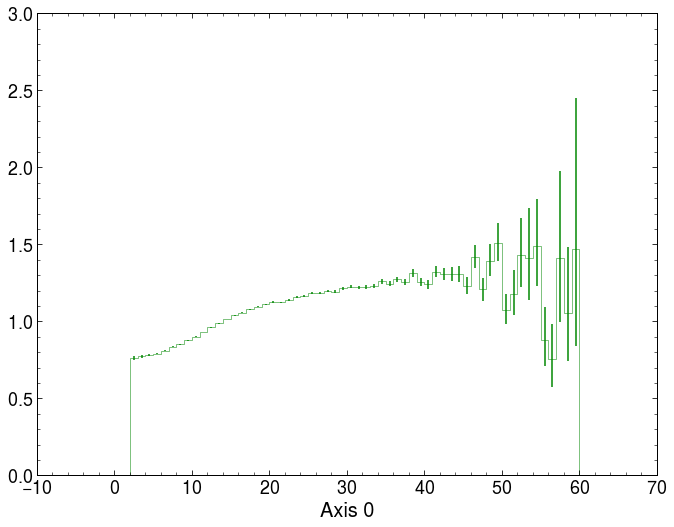

In [14]:
reweight_factors_unumpy_hist.plot()

In [15]:
p_Forward_Quark = none_Extraction_Results['jet_nTracks'][500]['p_Forward_Quark'] 
p_Central_Quark = none_Extraction_Results['jet_nTracks'][500]['p_Central_Quark'] 

In [18]:
unumpy.nominal_values(safe_array_divide_unumpy(p_Forward_Quark, p_Central_Quark))

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])

In [20]:
reweight_factor[500]['jet_nTracks']['quark_factor']

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])

In [23]:
p_Forward_Quark = jet_nTracks_Extraction_Results['jet_nTracks'][500]['p_Forward_Quark'] 
p_Central_Quark = jet_nTracks_Extraction_Results['jet_nTracks'][500]['p_Central_Quark'] 
unumpy.nominal_values(safe_array_divide_unumpy(p_Forward_Quark, p_Central_Quark))

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
Forward_Quark = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_Quark'] 
Central_Quark = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_Quark'] 
unumpy.nominal_values(safe_array_divide_unumpy(Forward_Quark, Central_Quark))

array([0.        , 0.        , 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849,
       1.31379849, 1.31379849, 1.31379849, 1.31379849, 1.31379849])

In [32]:
Forward_MC = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_MC'] 
Central_MC = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_MC'] 
unumpy.nominal_values(safe_array_divide_unumpy(Forward_MC, Central_MC))

array([0.        , 0.        , 1.21767289, 1.26642917, 1.28093509,
       1.28329254, 1.28076419, 1.27303198, 1.2632968 , 1.24522147,
       1.22724756, 1.19657381, 1.15735265, 1.11811293, 1.07321769,
       1.02426757, 0.98733261, 0.94703545, 0.91577304, 0.88823322,
       0.86183084, 0.85229504, 0.83251869, 0.81641791, 0.80564747,
       0.78841216, 0.78127251, 0.77436372, 0.77557137, 0.76031648,
       0.75251901, 0.75687684, 0.7555381 , 0.75150811, 0.73437561,
       0.74209481, 0.73044737, 0.73965509, 0.71130251, 0.73663547,
       0.75002381, 0.70186328, 0.72018949, 0.71842898, 0.72127247,
       0.76781505, 0.68392674, 0.78714182, 0.69118317, 0.62931829,
       0.87814786, 0.81478289, 0.72071432, 0.66577287, 0.64191887,
       1.04466625, 1.23293119, 0.68629977, 0.93031275, 0.67713103])

In [29]:
Forward_Data = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_Data'] 
Central_Data = jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_Data'] 
unumpy.nominal_values(safe_array_divide_unumpy(Forward_Data, Central_Data))

array([0.        , 0.        , 1.28494638, 1.25610507, 1.2527765 ,
       1.27943553, 1.26903298, 1.25618079, 1.25556635, 1.23924529,
       1.21970923, 1.1877279 , 1.14714353, 1.10821757, 1.06022803,
       1.01952577, 0.98243246, 0.94422567, 0.91393344, 0.87891143,
       0.85559936, 0.84315221, 0.81990491, 0.79897025, 0.78823617,
       0.77008339, 0.76143818, 0.7554173 , 0.75274306, 0.73590385,
       0.73176893, 0.72933035, 0.72892015, 0.72939846, 0.70351695,
       0.71570255, 0.70135884, 0.70855163, 0.6805095 , 0.7098435 ,
       0.72275012, 0.67621984, 0.68002947, 0.68078134, 0.67534597,
       0.72525743, 0.638217  , 0.749305  , 0.6345125 , 0.5940087 ,
       0.83520237, 0.75763019, 0.61304922, 0.63547112, 0.57435373,
       1.07989106, 1.21435899, 0.57812294, 0.80407853, 0.65227026])

In [26]:
jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_Data'] * reweight_factor[500]['jet_nTracks']['quark_factor'] - \
jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_Data']

array([0.0+/-0, 0.0+/-0, -6588.816937973497+/-164.62428506578175,
       -14489.013636283627+/-252.30837231339942,
       -31791.075424254326+/-379.4562535728943,
       -64226.60249615033+/-535.3404719103655,
       -103187.68158748207+/-705.3846248294577,
       -143531.4338062975+/-879.2897121185157,
       -186760.19991258805+/-1032.5388441349394,
       -211293.21775010304+/-1174.1097834176846,
       -220233.27882173285+/-1289.731551361678,
       -202103.32531801297+/-1394.0112002964167,
       -160755.418018708+/-1478.2273997391587,
       -112780.1695867033+/-1543.6872725991138,
       -44115.186992033035+/-1602.7884099676307,
       19121.094459264772+/-1646.1417742421627,
       77893.50098913698+/-1675.4930569725936,
       141381.2977815366+/-1702.2858395043206,
       191777.69627031242+/-1714.214275970277,
       246255.21197939035+/-1721.6984603370186,
       280343.01876776386+/-1714.6990138752926,
       278698.62434362713+/-1669.6947782686066,
       305424.485847668

In [93]:
for key, value in none_Extraction_Results['jet_nTracks'][500].items():
    if isinstance(value[0], uncertainties.core.AffineScalarFunc):
        if np.allclose(unumpy.nominal_values(none_Extraction_Results['jet_nTracks'][500][key]), 
                        unumpy.nominal_values(jet_nTracks_Extraction_Results['jet_nTracks'][500][key])):
            print(key)
        


Forward_MC
Forward_Data
Forward_Quark
Forward_Gluon
p_Forward_Quark
p_Forward_Gluon


In [95]:
none_Extraction_Results['jet_nTracks'][500]['Forward_MC'].sum()

21097206.48469242+/-6402.491704180149

In [96]:
jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_MC'].sum()

21097206.48469242+/-6402.491704180149

In [97]:
none_Extraction_Results['jet_nTracks'][500]['Central_MC'].sum()

21014702.675967507+/-6358.867027445567

In [98]:
jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_MC'].sum()

22657226.16865046+/-6894.874748299307

In [99]:
safe_array_divide_unumpy(jet_nTracks_Extraction_Results['jet_nTracks'][500]['Forward_MC'], \
    jet_nTracks_Extraction_Results['jet_nTracks'][500]['Central_MC'])

array([0.0+/-0, 0.0+/-0, 1.217672885054699+/-0.019936123062462084,
       1.2664291742597502+/-0.012676663105010035,
       1.280935087542528+/-0.008506340734929846,
       1.2832925393481676+/-0.006134623796936935,
       1.2807641851152365+/-0.004738297053546466,
       1.273031982047415+/-0.003882243836804974,
       1.263296802793218+/-0.0033431375629911966,
       1.2452214709280067+/-0.0029820326515469712,
       1.227247558850842+/-0.002739562080283918,
       1.1965738122157603+/-0.002547007577367531,
       1.1573526510995877+/-0.002392662826767595,
       1.1181129292914394+/-0.002265918307906377,
       1.073217686886844+/-0.0021502514741941476,
       1.0242675724015777+/-0.0020393479026407724,
       0.9873326113967631+/-0.0019606230913274333,
       0.9470354460042618+/-0.0018829625910775417,
       0.9157730435194131+/-0.0018335922105949811,
       0.8882332155433206+/-0.0017978138102339204,
       0.8618308420756937+/-0.0017709032829828866,
       0.8522950411836357+/-0

In [100]:
reweight_factor[500]['jet_nTracks']['quark_factor']

array([0.        , 0.        , 0.76287671, 0.77206436, 0.78046205,
       0.78836757, 0.80756539, 0.83377903, 0.84975514, 0.87610797,
       0.90003882, 0.93073216, 0.961505  , 0.98685415, 1.01537761,
       1.03822646, 1.05680637, 1.07684775, 1.09361761, 1.11031357,
       1.12490074, 1.1229523 , 1.13811487, 1.15667731, 1.16279753,
       1.18320585, 1.18639214, 1.19466769, 1.19309822, 1.21474442,
       1.2235124 , 1.21973189, 1.22118023, 1.22795447, 1.25946021,
       1.24542149, 1.27153147, 1.25341462, 1.31233369, 1.25738194,
       1.23949549, 1.32139524, 1.30564806, 1.30888985, 1.30645149,
       1.22996327, 1.41972372, 1.20696831, 1.39232868, 1.51015572,
       1.07586611, 1.17695639, 1.43084649, 1.40847933, 1.48883864,
       0.88045214, 0.75392405, 1.41258999, 1.05679928, 1.47108781])